# LiDAR Project



In [9]:
from lidar import Address, Building, HeightDataImage
import matplotlib.pyplot as plt

%matplotlib nbagg

## Steps

Object-oriented approach: everything has a class.

1. `Address`: Retrieve an **address** in Flanders
  * Get coordinates, attached buildings…
  * Find out which TIFF we need

In [3]:
my_add=Address(street="Hanzestedenplaats", number=1, zipcode=2000)
print(my_add)

Hanzestedenplaats 1, 2000 Antwerpen


Other way: by search string (*Geopunt Suggest API*)

In [5]:
my_add2=Address.from_search("Hanzestedenplaats 1 Antwerpen")
print(my_add2)

Hanzestedenplaats 1, 2000 Antwerpen


The `Address` also goes through the steps of retrieving the building shapes. api.basisregisters.vlaanderen.be provides all we need, in some steps.

1. **Address** (api.basisregisters.vlaanderen.be/v1/adressen) → **Building units** (_gebouweenheiden_)
2. **building units** (api.basisregisters.vlaanderen.be/v1/gebouweenheden) → *Building* (_Gebouwen_)
3. **building** (api.basisregisters.vlaanderen.be/v1/gebouwen) → **Polygon shapes**


<IPython.core.display.Javascript object>


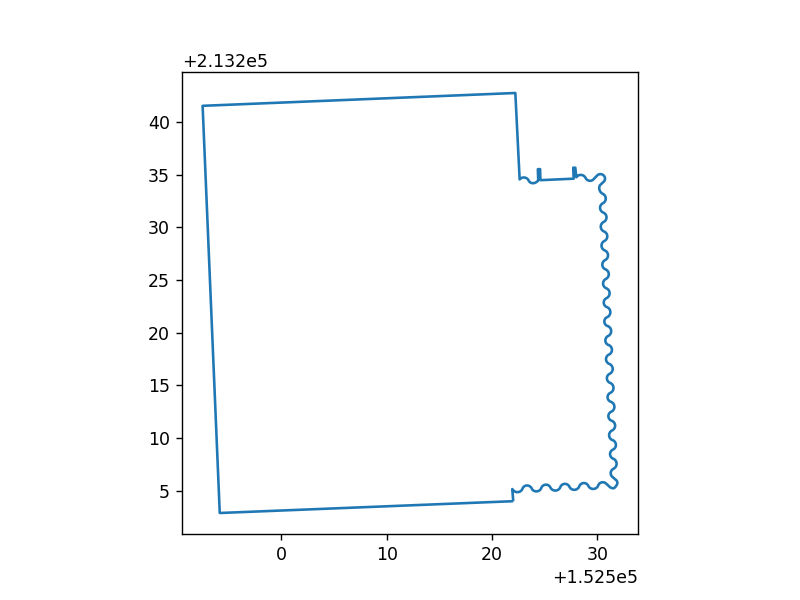

<AxesSubplot:>

In [7]:
my_add.get_building_shape().boundary.plot()

## Steps

Object-oriented approach: everything has a class.

3. `HeightDataImage`: wrapping class for a GeoTIFF
  * Give it the zone, resolution, and kind.
  * Generates correctly formatted *filename*
  * Checks availability and can download if needed.

In [12]:
my_img=HeightDataImage(zone=5, data_type="DSM", resolution="1m")
my_img.is_downloaded()

False

In [ ]:
my_img.download()

## Steps

Object-oriented approach: everything has a class.

3. `Building`: Get the correct **GeoTIFF**s.
  * Generate the file name according to reference
  * Check if locally available
  * Download if necessary 
  * Load DTM and DSM with rasterio

In [8]:
my_building=Building(my_add, auto_download=True)

Now we can plot.

<IPython.core.display.Javascript object>


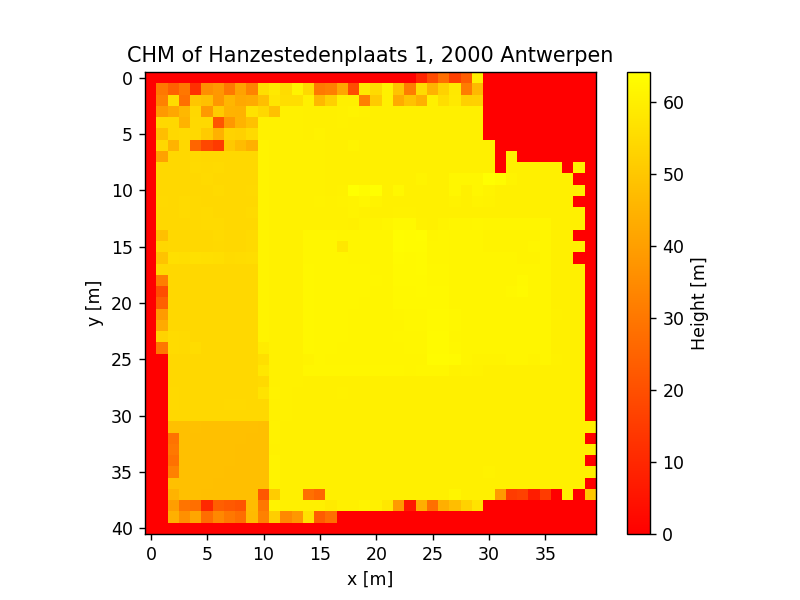

(<Figure size 640x480 with 2 Axes>,
 <AxesSubplot:title={'center':'CHM of Hanzestedenplaats 1, 2000 Antwerpen'}, xlabel='x [m]', ylabel='y [m]'>)

In [19]:
my_building.plot_image(cmap="autumn")

<IPython.core.display.Javascript object>


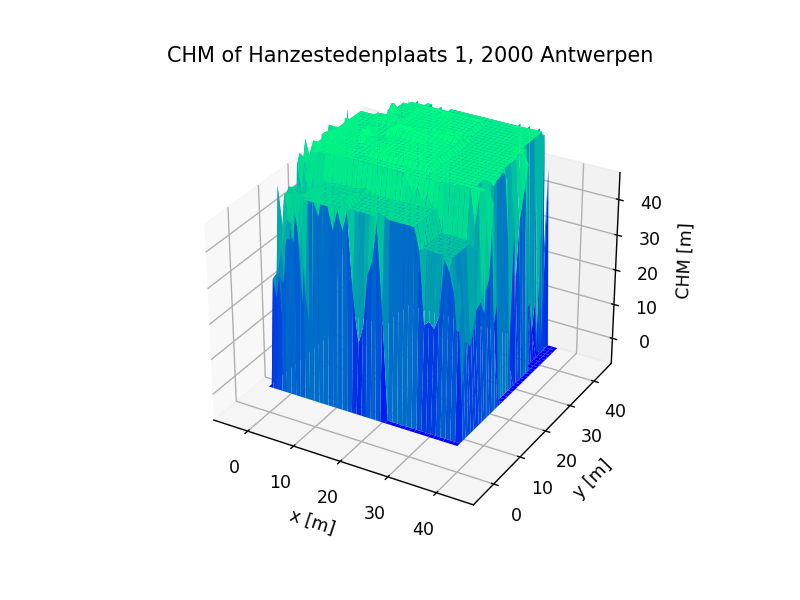

(<Figure size 640x480 with 1 Axes>,
 <Axes3DSubplot:title={'center':'CHM of Hanzestedenplaats 1, 2000 Antwerpen'}, xlabel='x [m]', ylabel='y [m]'>)

In [20]:
my_building.plot3d(cmap="winter")

## Unfinished business

* README
* Coordinates on plots
* Map point on big map
* 